## VIV on Circular Cylinder - June 11, 2015
This experiment sought to measure the displacement of a cylinder under VIV and visualising the velocity fields with PIV. This would be compared to a cylinder with strakes.

### Experimental setup
 - Transverse linear air bearing with 40mm cylinder.
 - Pump frequencies ranging from 
 - Each time signal is 120s long
 - Transition between tests is 180s
 - Data acquired at 100hz
 - Temperature 22.0C
 - Immersed depth 603mm
 - Mass of cylinder is 215.6g, oscillating mass is 814g
 - Natural frequency is 0.8559 Hz


In [170]:
import numpy as np
import wclablib as wclab
import pivio as piv
%matplotlib inline
import matplotlib.pylab as plt
from __future__ import division
import glob, os
import seaborn as sns

In [30]:
# Read in a single data file:
dat = np.loadtxt('/nas-6000/wclab/James/AMOG/20141126/AMOG20141126/TimeSeries/b_bare_19.00hz.dat',skiprows=1,delimiter=',')

# Rename columns to new variables:
time = dat[:,0]; lift = dat[:,1]; drag = dat[:,2]; disp = dat[:,3];

# Calculate sampling frequency:
fs = 1/(time[1]-time[0])
print('Sampling frequency is %gHz'%fs)

Sampling frequency is 100Hz


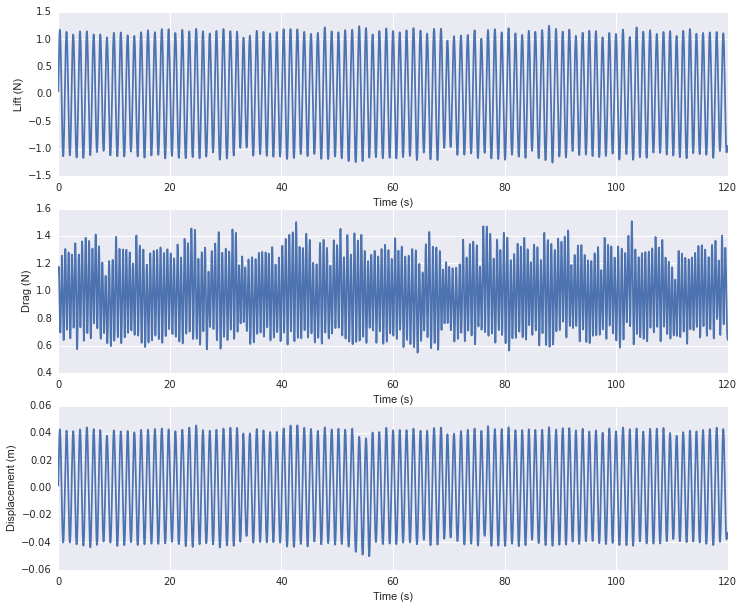

In [143]:
plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.plot(time,lift)
plt.xlabel('Time (s)')
plt.ylabel('Lift (N)')


plt.subplot(3,1,2)
plt.plot(time,drag)
plt.xlabel('Time (s)')
plt.ylabel('Drag (N)')

plt.subplot(3,1,3)
plt.plot(time,disp)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')

In [132]:
def process_timeseries(filename,rho=998,area=0.603*0.04,fn=0.8559):
    # Find velocity from header line:
    infile = open(filename, 'r')
    s = infile.readline()
    vel = []
    for t in s.split():
        try:
            vel = (float(t))/1000
        except ValueError:
            pass
    
    # Read in and process data:
    dat = np.loadtxt(filename,skiprows=1,delimiter=',')
    time = dat[:,0]; lift = dat[:,1]; drag = dat[:,2]; disp = dat[:,3];
    fs = 1/(time[1]-time[0])
    clrms = np.sqrt(np.mean(np.square(lift)))/(.5*rho*vel**2*area)
    cd = np.mean(drag)/(.5*rho*vel**2*area)
    f,mx,t = wclab.psdd(fs,disp)
    f = f[np.argmax(mx)]/fn
    ustar = vel/(fn*0.04)
    return clrms,cd,f,ustar

In [146]:
os.chdir('/nas-6000/wclab/James/AMOG/20141126/AMOG20141126/TimeSeries/')
files = glob.glob('b_bare_*.dat')
clrms = np.zeros(len(files))
cd = np.zeros(len(files))
fstar = np.zeros(len(files))
ustar = np.zeros(len(files))

for counter,f in enumerate(files): 
    clrms[counter],cd[counter],fstar[counter],ustar[counter] = process_timeseries(f)

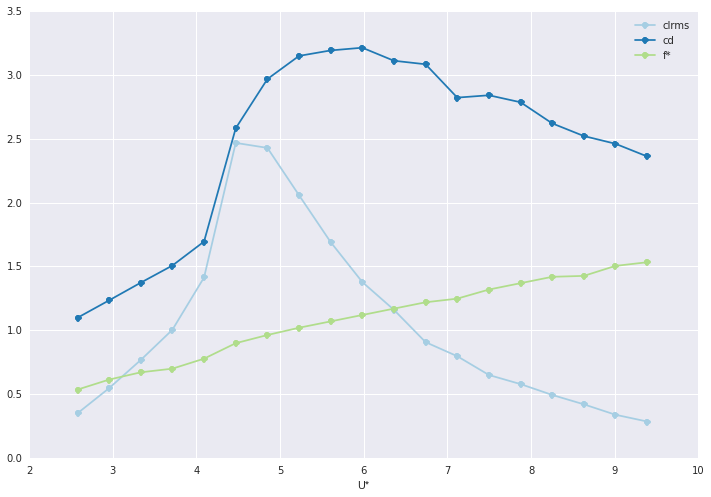

In [169]:
plt.figure(figsize=(12,8))
plt.plot(ustar,clrms,'o-',label='clrms')
plt.plot(ustar,cd,'o-',label='cd')
plt.plot(ustar,fstar,'o-',label='f*')
plt.xlabel('U*')
plt.legend()

#plt.plot(ustar,0.2*ustar,'k-')

In [157]:
files = glob.glob('r_agag*.dat')
rclrms = np.zeros(len(files))
rcd = np.zeros(len(files))
rfstar = np.zeros(len(files))
rustar = np.zeros(len(files))

for counter,f in enumerate(files): 
    rclrms[counter],rcd[counter],rfstar[counter],rustar[counter] = process_timeseries(f,fn=0.7701)

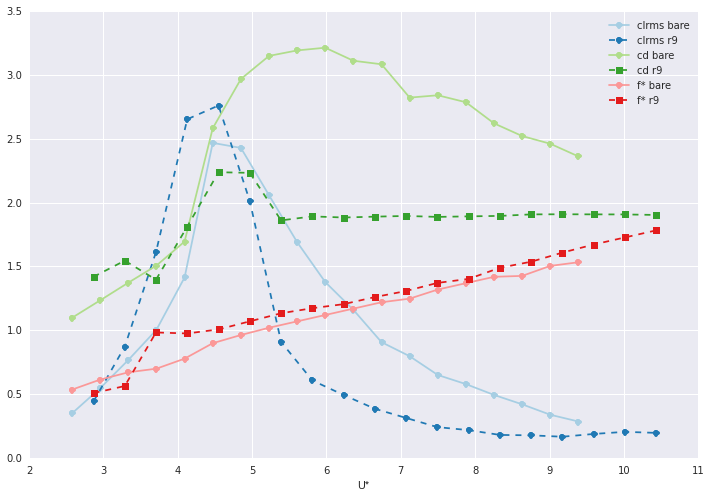

In [168]:
plt.figure(figsize=(12,8))
sns.set_palette("Paired")
plt.plot(ustar,clrms,'o-',label='clrms bare')
plt.plot(rustar,rclrms,'o--',label='clrms r9')

plt.plot(ustar,cd,'o-',label='cd bare')
plt.plot(rustar,rcd,'s--',label='cd r9')

plt.plot(ustar,fstar,'o-',label='f* bare')
plt.plot(rustar,rfstar,'s--',label='f* r9')
plt.xlabel('U*')
plt.legend()

#plt.plot(ustar,0.2*ustar,'k-')